<a href="https://colab.research.google.com/github/OriharaNozomy/Deep-Learning-Based-Diabetes-Prediction/blob/main/Deep_Learning_Based_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning-Based Diabetes Prediction




---



# Importing Data

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:

from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from zipfile import ZipFile
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam



In [ ]:
uri = "https://drive.google.com/uc?export=download&id=1l5SSixmwY1d0NE_0Jb-bp_XX3G9C9BoU"  # Updated URL for direct download
zip_path = keras.utils.get_file(origin=uri, fname="diabetes")
zip_file = ZipFile(zip_path)
zip_file.extractall()
csv_path = "diabetes.csv"

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


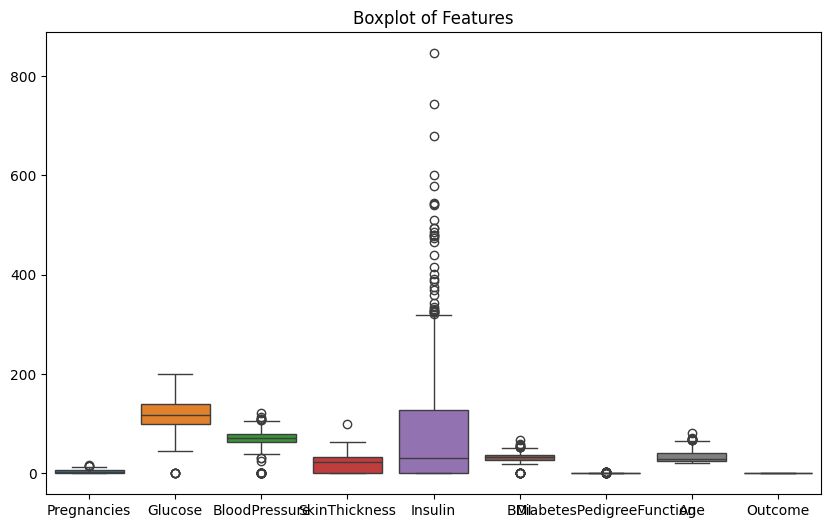

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for each feature to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Features")
plt.show()


In [ ]:
# Assuming your data is in a DataFrame called df
import pandas as pd

# Calculate IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop the rows where any feature is an outlier
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Check the cleaned data
print(f"Before cleaning: {df.shape}")
print(f"After cleaning: {df_cleaned.shape}")


Before cleaning: (768, 9)
After cleaning: (639, 9)


In [ ]:
# Columns where zero is an invalid or missing value
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with the median of the non-zero values for each column
for col in columns_with_invalid_zeros:
    non_zero_mean = df_cleaned[df_cleaned[col] != 0][col].mean()
    df_cleaned[col] = df_cleaned[col].replace(0, non_zero_mean)

<ipython-input-179-85d014df918e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].replace(0, non_zero_mean)


In [ ]:
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,126.89759,33.6,0.627,50,1
1,1,85,66,29.000000,126.89759,26.6,0.351,31,0
2,8,183,64,28.565217,126.89759,23.3,0.672,32,1
3,1,89,66,23.000000,94.00000,28.1,0.167,21,0
5,5,116,74,28.565217,126.89759,25.6,0.201,30,0


In [ ]:
#Normalizing data
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

No Diabetes: 439
Diabetes: 200


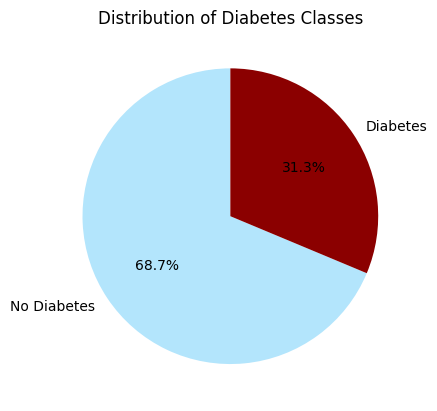

In [ ]:
import matplotlib.pyplot as plt


labels = ['No Diabetes', 'Diabetes']
class_counts = [sum(y == 0), sum(y == 1)]

# Print the number of each class
print(f'No Diabetes: {class_counts[0]}')
print(f'Diabetes: {class_counts[1]}')


colors = ['#B3E5FC', '#8B0000']

# Plot the pie chart

plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Diabetes Classes')
plt.show()


No Diabetes: 439
Diabetes: 439


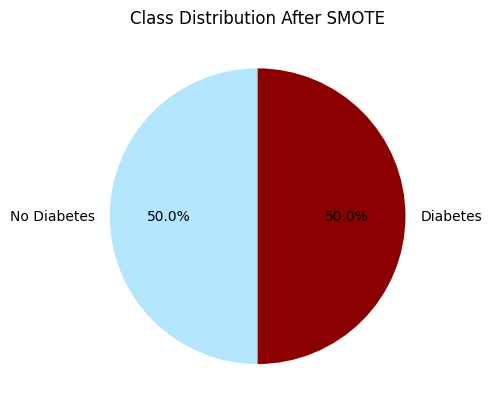

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Print class distribution after SMOTE
print(f'No Diabetes: {sum(y_resampled == 0)}')
print(f'Diabetes: {sum(y_resampled == 1)}')

labels = ['No Diabetes', 'Diabetes']
class_counts = [sum(y_resampled == 0), sum(y_resampled == 1)]
colors = ['#B3E5FC', '#8B0000']

plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Class Distribution After SMOTE')
plt.show()


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Model

In [ ]:
# #Model
# model = Sequential([
#     Dense(256, activation='sigmoid', input_shape=(X_train.shape[1],)),
#     BatchNormalization(),
#     Dropout(0.2),

#     Dense(128, activation='sigmoid'),
#     BatchNormalization(),
#     Dropout(0.2),

#     Dense(64, activation='sigmoid'),
#     Dropout(0.2),

#     Dense(32, activation='sigmoid'),
#     Dropout(0.2),

#     Dense(1, activation='sigmoid')
# ])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model = Sequential([

    Dense(256, activation='sigmoid', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='sigmoid'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='sigmoid'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# model_improved = Sequential([
#     Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.3),

#     Dense(32, activation='relu'),
#     Dropout(0.2),

#     Dense(1, activation='sigmoid')
# ])

# model_improved.compile(optimizer=Adam(learning_rate=0.001),
#                        loss='binary_crossentropy',
#                        metrics=['accuracy'])


#Model
model_improved = Sequential([
    Dense(256, activation='sigmoid', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='sigmoid'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='sigmoid'),
    Dropout(0.3),



    Dense(1, activation='sigmoid')
])
model_improved.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=16, verbose=1)


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.6363 - loss: 0.6675 - val_accuracy: 0.4397 - val_loss: 0.7023
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7305 - loss: 0.5468 - val_accuracy: 0.4397 - val_loss: 0.6985
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7511 - loss: 0.5008 - val_accuracy: 0.5035 - val_loss: 0.6792
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7561 - loss: 0.5208 - val_accuracy: 0.6170 - val_loss: 0.6584
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7262 - loss: 0.5090 - val_accuracy: 0.6170 - val_loss: 0.6606
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7481 - loss: 0.4881 - val_accuracy: 0.6241 - val_loss: 0.6628
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7525 - loss: 0.5020 - val_accuracy: 0.6454 - val_loss: 0.6475
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7592 - loss: 0.4900 - val_accuracy: 0.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
]


In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights_array = class_weight.compute_class_weight(class_weight='balanced',
                                                        classes=np.unique(y_train),
                                                        y=y_train)
class_weights = dict(enumerate(class_weights_array))


In [ ]:
history_improved = model_improved.fit(X_train, y_train,
                                      epochs=100,
                                      batch_size=32,
                                      validation_split=0.2,
                                      callbacks=callbacks,
                                      class_weight=class_weights)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5945 - loss: 0.6939 - val_accuracy: 0.5603 - val_loss: 0.6697 - learning_rate: 0.0010
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7315 - loss: 0.5288 - val_accuracy: 0.4539 - val_loss: 0.6904 - learning_rate: 0.0010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7236 - loss: 0.5309 - val_accuracy: 0.4397 - val_loss: 0.7260 - learning_rate: 0.0010
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7282 - loss: 0.5069 - val_accuracy: 0.4397 - val_loss: 0.7264 - learning_rate: 0.0010
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7818 - loss: 0.4675 - val_accuracy: 0.4397 - val_loss: 0.7420 - learning_rate: 0.0010
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7489 - loss: 0.5126 - val_accuracy: 0.4397 - val_loss: 0.7395 - learning_rate: 0.0010
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7800 - loss: 0.4979 - val_

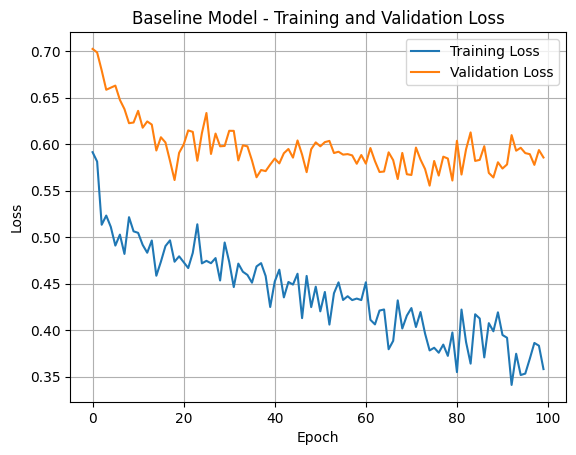

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Baseline Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


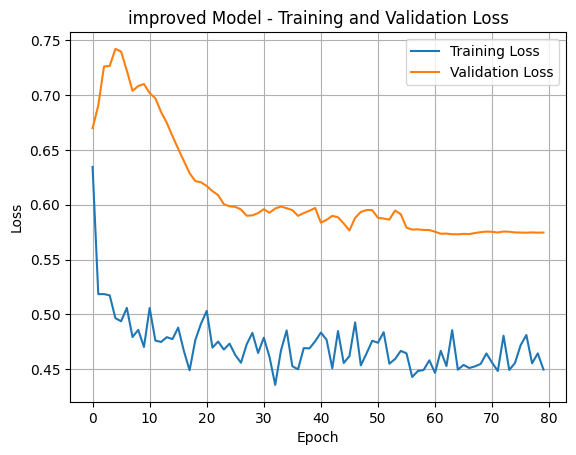

In [ ]:
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.title('improved Model - Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


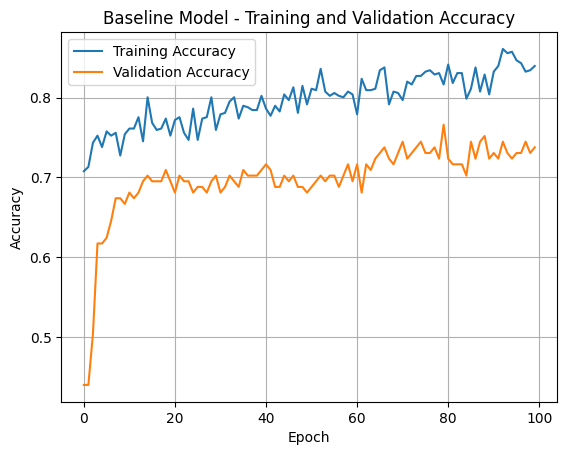

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline Model - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


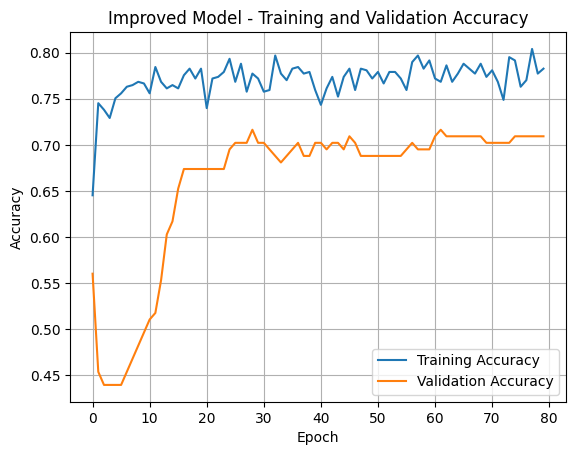

In [ ]:
plt.plot(history_improved.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.title('Improved Model - Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8610 - loss: 0.3530 
Test Accuracy: 0.85


In [ ]:
loss, accuracy = model_improved.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7876 - loss: 0.4350 
Test Accuracy: 0.78


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


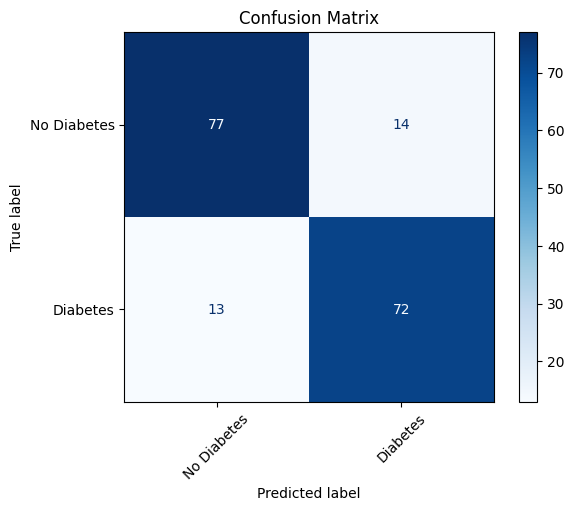

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Convert probabilities to class labels
y_pred = (model.predict(X_test) > 0.5).astype("int").flatten()
y_true = y_test.values

# Plot confusion matrix
class_names = ["No Diabetes", "Diabetes"]
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


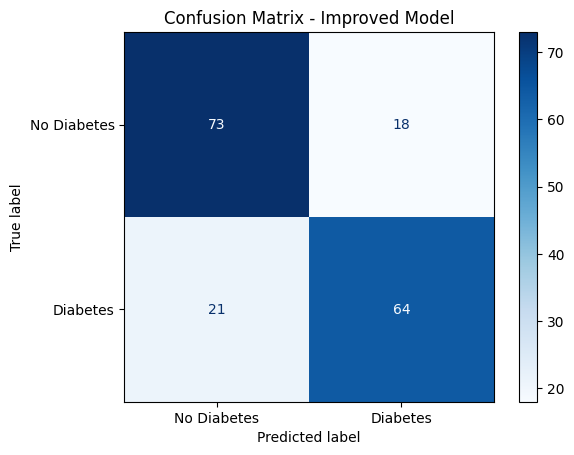

In [ ]:
y_pred_ = (model_improved.predict(X_test) > 0.5).astype("int").flatten()

cm = confusion_matrix(y_test, y_pred_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Improved Model")
plt.show()
